In [138]:
# 데이터 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
##그래프 비즈 나무구조 시각화
import graphviz

#랜덤 포레스트 불러오기
from sklearn.ensemble import RandomForestRegressor

##데이터 분할
from sklearn.model_selection import train_test_split

#예측 회귀
from sklearn.tree import DecisionTreeRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

##최적 모델 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import os
import pydot
from IPython.display import Image, display


# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

[]

In [100]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


# 실습 1. 

## 데이터 셋 구성 및 변환

In [105]:
#데이터 불러오기 
df_raw = pd.read_csv("./DIABETES.csv", encoding = "euc-kr")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [11]:
# #범주형 변수의 dummy변수화 
# df_raw['GENDER']=pd.get_dummies(df_raw['GENDER'],drop_first=True)
# df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,1,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,0,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,1,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,0,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,0,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [106]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [107]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


## 모델 생성

In [104]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print(f"Score on training set: {tree_uncustomized.score(df_train_x, df_train_y)}")
# test 데이터 설명력
print(f"Score on test set: {tree_uncustomized.score(df_test_x, df_test_y)}")

Score on training set: 1.0
Score on test set: -0.14273904167992146


- 모델생성 및 학습 결과 train데이터의 설명력은 1이지만 test 데이터의 설명력이 음수로 나왔다. 
- 그렇다면 모델이 train데이터에 대해 완전히 과대적합 되어 있다고 볼수도 있을 것이다. 
- 즉 다시 말하자면 이 모델은 test 데이터에 대해서는 설명력이 없다고 하는 것이므로 일반화 성능이 떨어진다.

In [75]:
## 현재 생성된 트리모델의 옵션확인

tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [76]:

train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [77]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

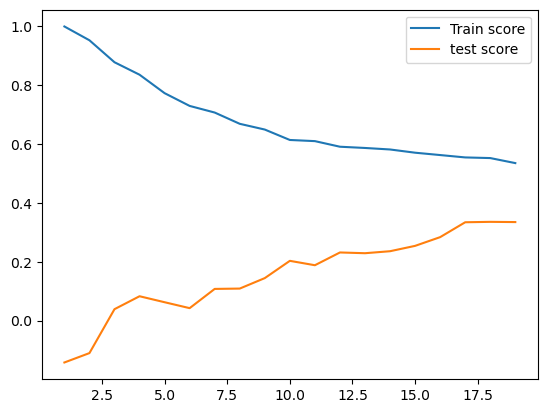

In [78]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_leaf,train_score,linestyle="-",label="Train score")
plt.plot(para_leaf,test_score,linestyle="-",label="test score")

plt.legend()

- 모델의 최소 잎사귀를 지정하여 규제를 가하고 
- 모델의 설명력을 그림으로 그려본 결과이다. 
- train 데이터의 설명력이 지속적으로 낮아지는데 반해 테스트 데이터의 설명력이 높아졌다. 
- 그렇다면 다음과 같이 for문의 수치를 조정하여볼것이다. 


In [79]:

train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [80]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

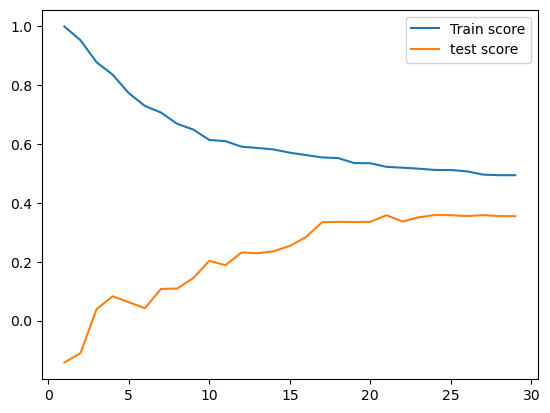

In [81]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_leaf,train_score,linestyle="-",label="Train score")
plt.plot(para_leaf,test_score,linestyle="-",label="test score")

plt.legend()

- test 데이터의 대한 모델의 설명력은 잎사귀 17이상부터 더이상 상승하지 않는 모습을 보인다. 
- 따라서 이 경우에는 17로 설정하는 것이 가장 타당해 보인다. 

In [82]:
# min_sample_split: 분리 노드의 최소 자료수 변경에 따른 모델 성능

## 파라미터 조정 

#train 데이터 와 test데이터의 설명력을 저장하기
train_score=[]
test_score=[]

#min_samples_leaf: 잎사귀 최소 자료수
para_split=[n_leaf for n_leaf in range(2,100)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,
                              min_samples_leaf=8,
                               min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
    
#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSampsplit']=para_split
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [83]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSampsplit,TrainScore,TestScore
0,2,0.669,0.109
1,3,0.669,0.109
2,4,0.669,0.109
3,5,0.669,0.109
4,6,0.669,0.109
...,...,...,...
93,95,0.458,0.338
94,96,0.458,0.338
95,97,0.458,0.338
96,98,0.458,0.338


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

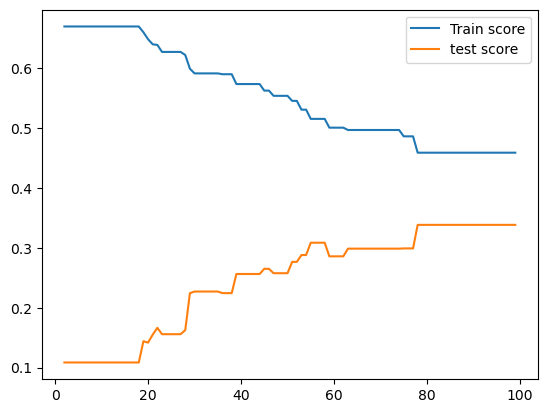

In [84]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_split,train_score,linestyle="-",label="Train score")
plt.plot(para_split,test_score,linestyle="-",label="test score")

plt.legend()

- 분리 노드의  최소 자료수를 설정하였으나 초반에는 별 의미가 없었다. 
- 그러나 100번을 돌려본 결과 최소 자료수 80부근에서 최종적으로 test 설명력이 가장 높은 것으로 생각 되었다. 

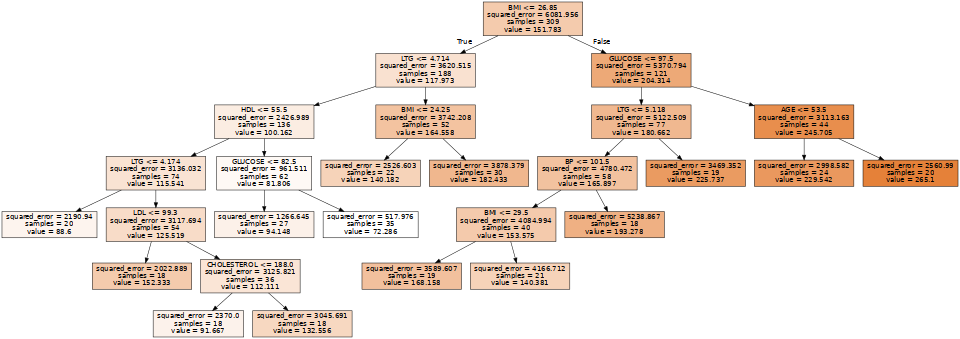

In [85]:
# 그렇다면 이를 시각화 해보자 

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=17 모델
##분리노드의 최소 자료수 20모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=18,min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

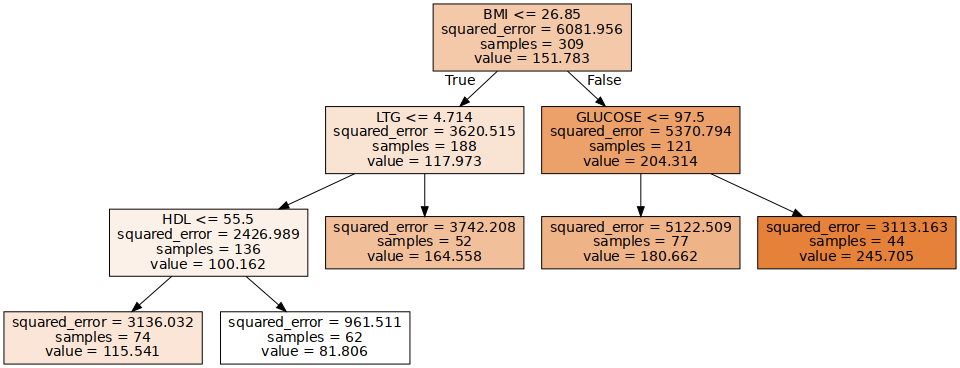

In [86]:
# 그렇다면 이를 시각화 해보자 

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=17 모델
##분리노드의 최소 자료수 80모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=18,min_samples_split=80)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

- 상식적으로 생각해보자면 분류 샘플의 최소 자료수가 적을수록 노드가 깊어지며 성능이 좋을 것이라 생각되나 결과는 샘플의 수가 80이 더욱 낮은 오차율을 보여주었다. 

In [96]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [97]:
#모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.556,0.264
4,5,0.601,0.199
5,6,0.634,0.157
6,7,0.643,0.146
7,8,0.648,0.142
8,9,0.648,0.142
9,10,0.648,0.142


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

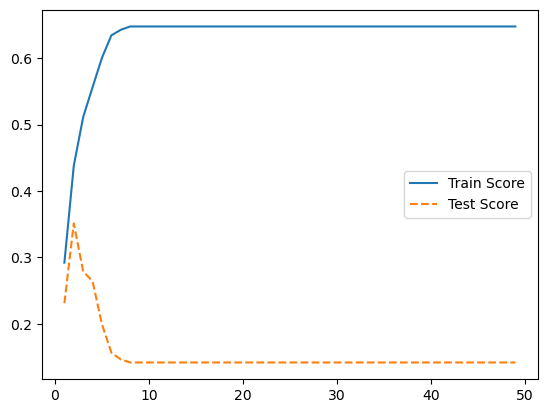

In [89]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

- 모델의 뎁스를 조절하니 초반부에만 살작 test 데이터의 설명력이 올라갔다가 이후 낮아졌다. 
- 모델의 뎁스를 깊게 하지 않는 것이 좋을 것이다. 
- 또한 이러한 결과는 앞서 본것처럼 최소 샘플의 수를 너무 작게 분리하는 것이 오히려 좋지 않음을 나타내 주기도 하는 것으로 보인다,

In [95]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 18, min_samples_split = 70, max_depth = 4, random_state=1234 )
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 18,
 'min_samples_split': 70,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

- 최종적으로 선정된 모델의 parameter값은 위 와 같다 
- 모델은 18개의 잎사귀 노드 최소 자료수를 가진다. 
- 모델은 70개의 분리 노드 최소 자료수를 가진다. 
- 4의 깊이를 가지고 있다

In [91]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [164.55769231 164.55769231 125.51851852  88.6        165.89655172
 164.55769231 164.55769231  81.80645161 125.51851852  81.80645161]


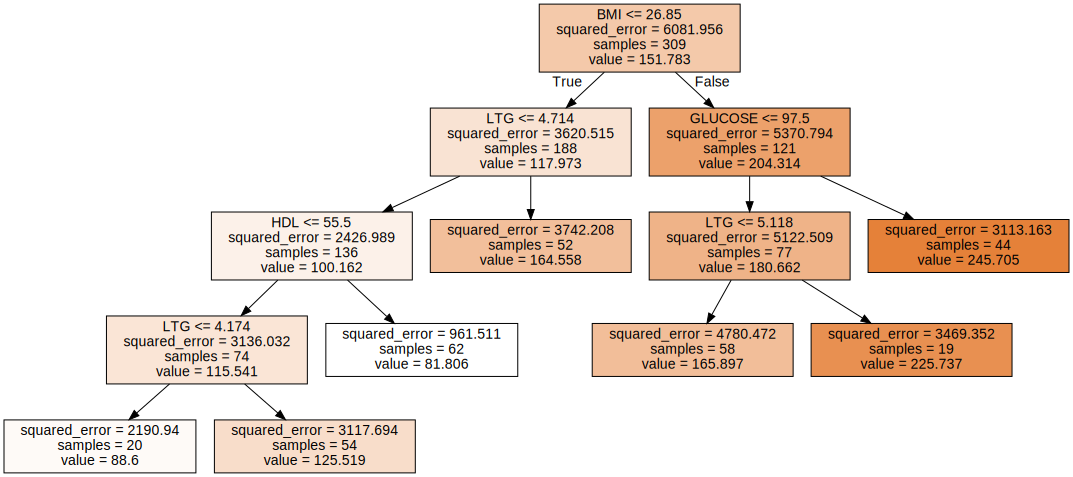

<Figure size 700x700 with 0 Axes>

In [92]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [93]:
# 결론 도출

## 설명변수의 중요도: feature_importance

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

#데이터 프레임 정렬
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.588
8,LTG,0.244
9,GLUCOSE,0.127
6,HDL,0.041
0,AGE,0.000
1,GENDER,0.000
3,BP,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

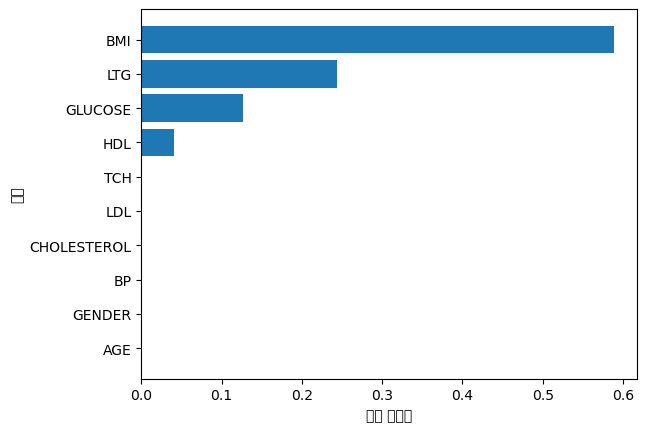

In [94]:
## 설명변수 중요도 그래프 
# 중요한 변수를 상위에 그림

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 해당 모델의 결과 설명변수의 영향력을 살펴보면 bmi가 가장 중요한 것으로 작용함을 알 수있다. 
- 또한 그 다음으로 ltg와 혈당수치, 고밀도 중성지방등의 영향력이 차례로 등장한다. 
- 이외의 변수는 영향력을 행사하지 않아 보이지만 ldl등의 저밀도 중성지방이 심혈관 질환등과 연관되어 나타나는 나쁜것이라는 점을 고려해볼때 완전히 관련이 없지는 않을 것으로 보인다. 

In [155]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["1.0", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', min_samples_leaf=16)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 2}

best score: 
0.4


# 실습 2. 랜덤 포레스트

In [108]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.919
Score on test set: 0.455


In [109]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [110]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [111]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.892,0.393
1,20,0.908,0.404
2,30,0.908,0.432
3,40,0.911,0.442
4,50,0.914,0.458
5,60,0.915,0.454
6,70,0.915,0.451
7,80,0.917,0.451
8,90,0.919,0.450
9,100,0.919,0.455


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

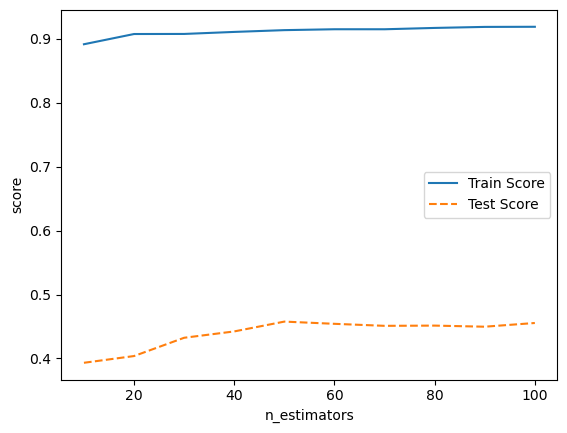

In [112]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

- 랜덤포레스트는 같은 데이터 셋에서 test에 0.45의 설명력을 가졌다. 
- 그러나 이후 변수들을 조절해도 test데이터의 설명력이 더이상 유의미하게 증가하지는 않아보였다. 
- train 데이터가 0.9 이상의 설명력을 보여주는데 반하여 test데이터의 0.45 정도의 설명력은 모델이 train데이터에 과대 적합되어있다고 볼수 있다.

In [114]:

# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.455
1,2,0.883,0.461
2,3,0.832,0.471
3,4,0.786,0.470
4,5,0.752,0.468
5,6,0.718,0.470
6,7,0.694,0.475
7,8,0.671,0.474
8,9,0.650,0.478
9,10,0.633,0.476


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

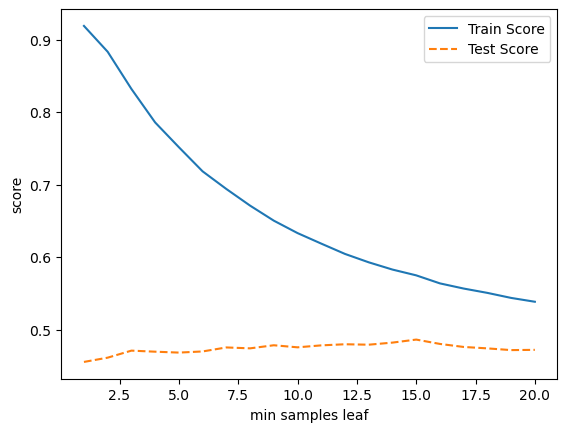

In [115]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

- train 데이터가 지속적으로 감소함에도 불구하고 test데이터는 유의미한 상승을 보여주지 못하고있다. 다만. 15개의 개수정도가 적절할 것으로 보인다. 

In [116]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.718,0.470
1,6,0.718,0.470
2,8,0.718,0.470
3,10,0.718,0.470
4,12,0.718,0.470
5,14,0.706,0.472
6,16,0.693,0.473
7,18,0.676,0.474
8,20,0.665,0.475
9,22,0.654,0.474


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

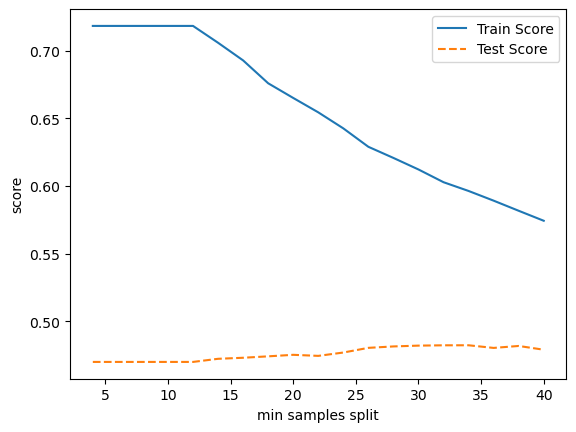

In [118]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리노드의 개수가 높아짐에도 불구하고 test데이터의 급격한 상승은 없으나 30까지는 적어도 지속적으로 상승하고 있는 것처럼 보인다. 
- 따라서 분리노드의 적절한 개수를 30으로 잡는게 중요하다고 생각된다. 

In [119]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                               min_samples_leaf = 6, min_samples_split = 14,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.387,0.406
1,2,0.491,0.474
2,3,0.568,0.492
3,4,0.630,0.487
4,5,0.674,0.480
5,6,0.696,0.473
6,7,0.704,0.472
7,8,0.706,0.472
8,9,0.706,0.472
9,10,0.706,0.472


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

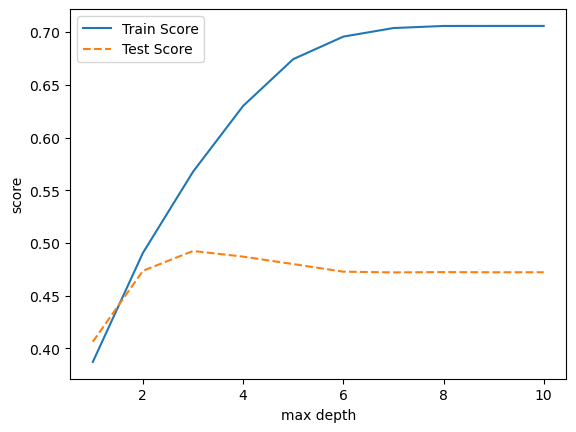

In [129]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

- 깊이는 2까지 train데이터와 test데이터가 유사한 상승을 보여주고 있다 
- 다만 이후부터는 test데이터의 설명력이 높아지지 않는다. 

In [130]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 15,
                                 min_samples_split = 30, max_depth = 3)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.544
Score on test set: 0.492


- 최종적으로 설명되는 모델의 파라미터 값은 다음과 같다. 
    - 최소 잎사귀의 샘플 개수는 15이다. 
    - 분리노드의 최소 샘플값은 30정도이다. 
    - 깊이는 3정도를 잡았다. 

In [131]:
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [159.03606118 176.10558452 109.22681915  94.74629753 152.1913129
 159.77930986 159.77188493 100.32314071 112.48887169 152.55196254]


In [132]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

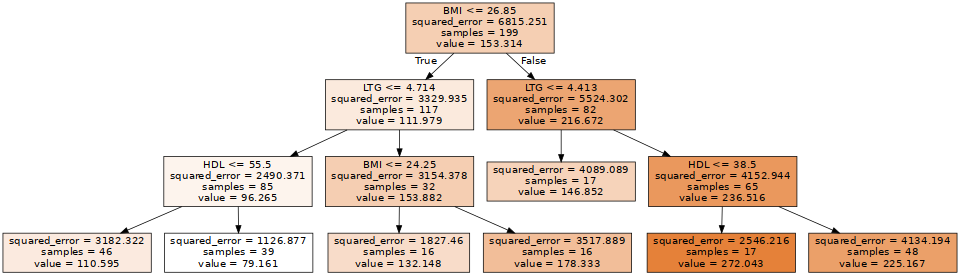

In [133]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)


(graph,)=pydot.graph_from_dot_file("rfr_final_0.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

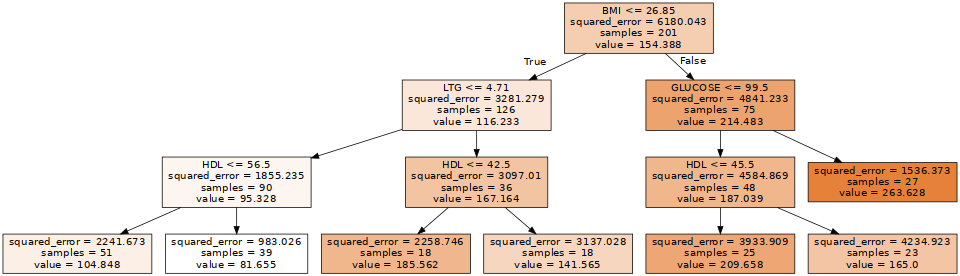

In [134]:
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names = v_feature_name, 
                impurity = True, filled = True)

(graph,)=pydot.graph_from_dot_file("rfr_final_10.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

In [135]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.443
8,LTG,0.391
9,GLUCOSE,0.062
3,BP,0.048
6,HDL,0.033
7,TCH,0.007
0,AGE,0.006
5,LDL,0.006
4,CHOLESTEROL,0.003
1,GENDER,0.002


Text(0, 0.5, '변수')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

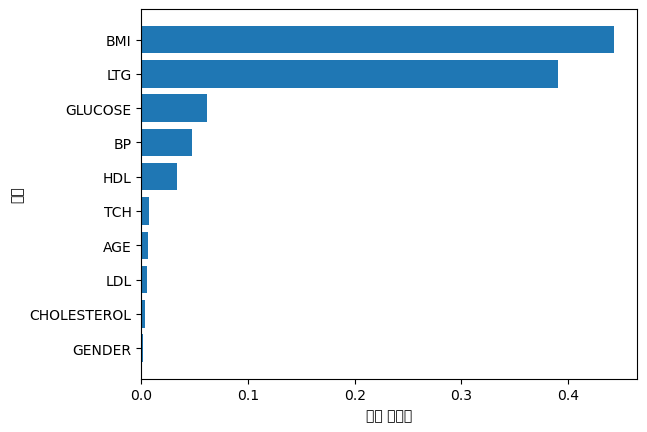

In [136]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 그래프를 본다면 bmi의 결정계수가 가장 설명력이 높다. 
    - 이후 ltg, 혈당수치, bp등이 설명력이 높았다. 
    - 의사결정 나무에 비해서 모든 변수가 유의미한 설명력을 나타내나 다만 상식과는 다르게 성별은 큰 영향을 주지 못하는 것으로 보인다.

In [156]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

KeyboardInterrupt: 

# 실습 3. 그래디언트 부스트

In [139]:
# 모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.865
Score on test set: 0.451


In [140]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

- 그래디언트 부싕의 경우 모델의 설명력은 train데이터가 0.865이고 test 0.45이다. 
- 따라서 랜덤포레스트의 값과 큰 차이가 없으며 이는 train데이터에 과대적합 되어있고 test데이터에 대해서는 절반 정도의 예측력을 가진다고 생각한다. 

In [141]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.504,0.430
1,20,0.639,0.494
2,30,0.707,0.500
3,40,0.751,0.486
4,50,0.778,0.480
5,60,0.802,0.471
6,70,0.825,0.465
7,80,0.841,0.462
8,90,0.852,0.458
9,100,0.865,0.451


- 모델의 트리수를 변경하였는데 그 결과 train데이터의 설명력이 늘어났다. 
- 반면 test데이터의 설명력은 큰 변화를 보이지 않다.
- 그렇다면 적절한 트리수는 30개 정도라고 보인다. 이는 train 수치와 test 수치 값을 주관적으로 판단한 값이다. 

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

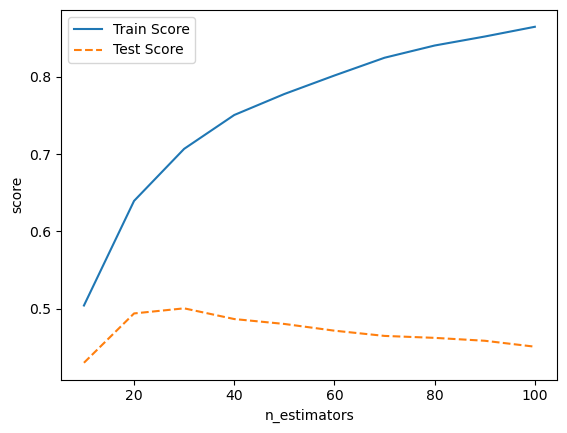

In [142]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [143]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.707,0.500
1,2,0.708,0.505
2,3,0.701,0.505
3,4,0.700,0.492
4,5,0.691,0.468
5,6,0.683,0.492
6,7,0.682,0.496
7,8,0.675,0.490
8,9,0.679,0.498
9,10,0.684,0.502


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

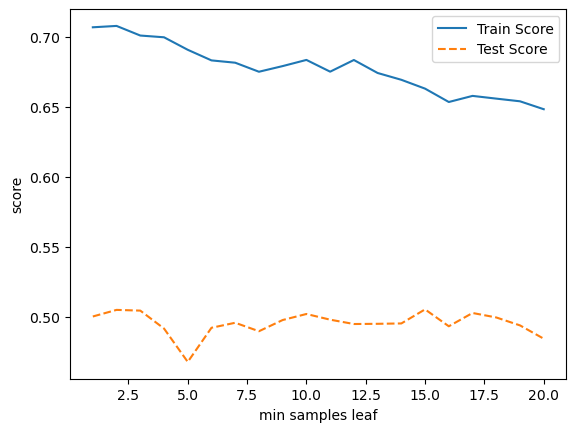

In [144]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

- 모델의 잎사귀의 최소 샘플수를 찾아보았는데 4가 가장 train데이터와 test데이터간의 균형이 맞아보인다. 

In [145]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.675,0.498
1,4,0.675,0.498
2,6,0.675,0.498
3,8,0.675,0.498
4,10,0.675,0.498
5,12,0.675,0.498
6,14,0.675,0.498
7,16,0.675,0.498
8,18,0.675,0.498
9,20,0.675,0.498


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

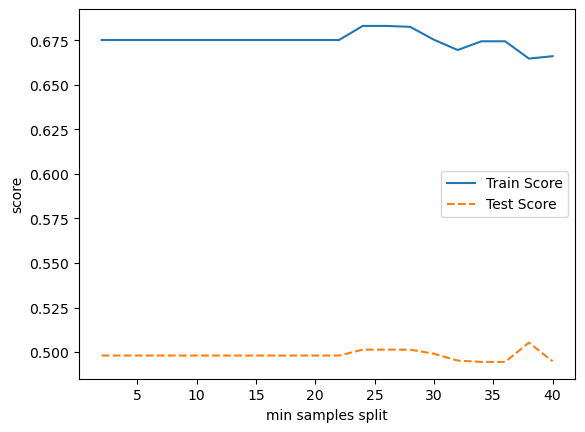

In [146]:

# 모델 설명력 그래프 확인 : 22개
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리된 노드의 잎사귀의 적정 샘플수를 판단하여 보건데 train데이터와 test 데이터가 일관적으로 움직이기때문에 큰 변화를 가지지 않는다. 
- 따라서 그나마 test데이터의 설명력이 높은 38개의 샘플을 설정하는 것이 가장 좋아보인다. 

In [147]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.486,0.495
1,2,0.583,0.515
2,3,0.675,0.498
3,4,0.757,0.475
4,5,0.822,0.438
5,6,0.842,0.461
6,7,0.861,0.461
7,8,0.868,0.437
8,9,0.870,0.444
9,10,0.870,0.443


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

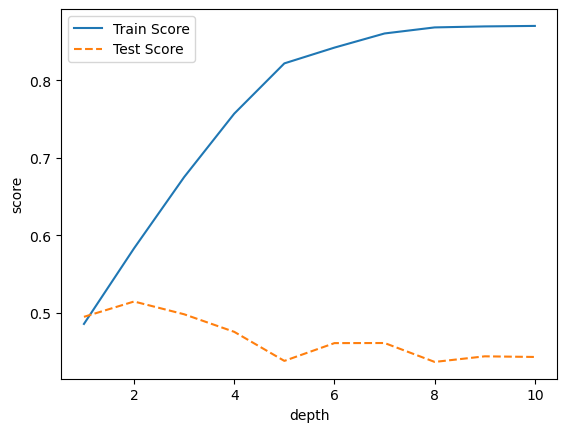

In [148]:
# 모델 설명력 그래프 확인 : 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

- 적절한 깊이를 탐색하여 보건대 2와 4를 선택했다. 이는 train-test 데이터가 서로 유사한 성향을 보이는 2와 train데이터의 설명력이 좀 더 높은 4가 적절하여 보인다. 

In [149]:
# learning_rate: 학습률 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# learning rate: 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.757,0.475
1,0.2,0.832,0.446
2,0.3,0.896,0.373
3,0.4,0.915,0.374
4,0.5,0.944,0.226
5,0.6,0.958,0.120
6,0.7,0.961,0.299
7,0.8,0.975,0.173
8,0.9,0.974,0.017


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

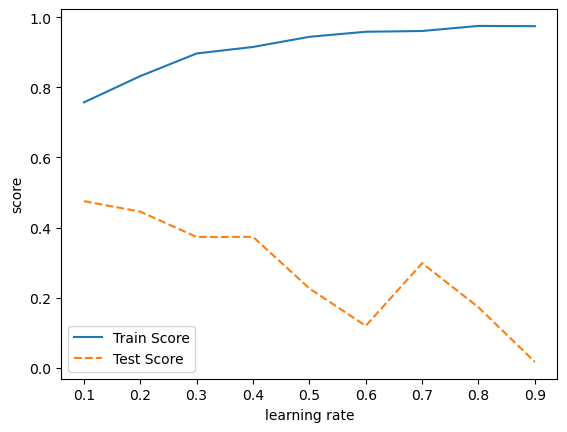

In [150]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

- 적절한 학습률은 얼마일까?
    - test 데이터의 설명력을 기준으로 한다면 0.1로 잡는 것이 좋아보인다. 

In [151]:
# 최종모델 선택
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 4,
                                     min_samples_split = 38, max_depth = 4, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.748
Score on test set: 0.490


- 최종 모델에 경우 앞서 뽑은 값인 트리개수 30, 깊이 4, 최소 잎사귀 샘플개수 4개와 분리노드 샘플개수 38로 하였으며 학습률은 0.1로 잡았다. 
- 매개변수를 지정해주지 않은 초기 모델에 비해 조금더 상승한 값이며 다른 매개변수들의 조정 결과 값과 비교하여보아도 큰 차이가 없음을 확인 할수 있었다.

In [152]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred =gb_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [150.27558896 211.13144201 115.58472697  94.87479714 117.5989896
 180.4776669  145.25577673 139.11787046 142.65785034 127.87929614]


In [153]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.409
8,LTG,0.257
3,BP,0.082
9,GLUCOSE,0.071
6,HDL,0.042
4,CHOLESTEROL,0.032
5,LDL,0.031
0,AGE,0.030
7,TCH,0.027
1,GENDER,0.019


Text(0, 0.5, '변수')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

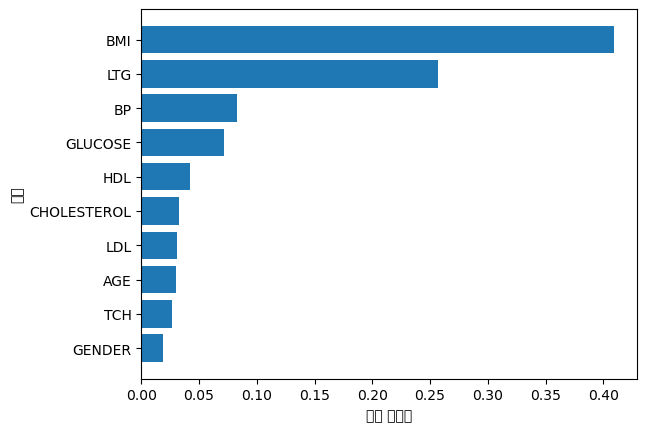

In [154]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 최종 모델에서의 변수 중요도를 살펴보자면 역시나 bmi가 가장 큰 영향력을 미치는 것으로 확인 할 수 있었다. 
- 더불어 다른 변수들의 중요도가 조금 변화하였다. 예컨데 혈당 수치가 미치는 영향과 콜레스테롤 수치가 미치는 영향 즉 중요도가 더욱 증가함을 확인할수 있었다. 
- 또한 기타 다른 변수들의 중요도가 보완되어 증가하였으므로 변수들의 전반적인 중요도가 상승하였음을 확인 할 수 있다. 

In [ ]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"], 
              "learning_rate": para_lr, "max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))